Checking ratio of update norms to parameter norm values to evaluate LR scale

In [19]:
import pylearn2.utils
import pylearn2.config
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os.path

Model trained on on 0.1 split of data

In [63]:
model = pylearn2.utils.serial.load(os.path.expandvars('${DATA_DIR}/plankton/models/learning_rate_experiment/ilr_5e-2_lin_decay_adj_on_recent.pkl'))

In [64]:
print(model)

h1
	Input space: Conv2DSpace(shape=(48, 48), num_channels=1, axes=('b', 0, 1, 'c'), dtype=float32)
	Total input dimension: 2304
h2
	Input space: Conv2DSpace(shape=(26, 26), num_channels=48, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 32448
h3
	Input space: Conv2DSpace(shape=(28, 28), num_channels=128, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 100352
h4
	Input space: Conv2DSpace(shape=(15, 15), num_channels=128, axes=('b', 'c', 0, 1), dtype=float32)
	Total input dimension: 28800
y
	Input space: VectorSpace(dim=1024, dtype=float32)
	Total input dimension: 1024


Plot train and valid set NLL

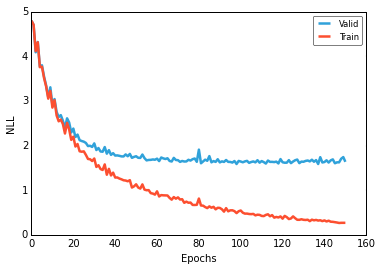

In [65]:
plt.plot(model.monitor.channels['valid_y_y_1_nll'].val_record)
plt.plot(model.monitor.channels['train_y_y_1_nll'].val_record)
plt.legend(['Valid', 'Train'])
plt.ylabel('NLL')
plt.xlabel('Epochs')

Strangely though overfitting to training set does not seem to be increasing validation set NLL?

Get channel names corresponding to update norms and parameternorms

In [57]:
mean_update_channels = [c for c in model.monitor.channels if 'mean_update' in c]
print('\n'.join(mean_update_channels))

mean_update_h1_W_kernel_norm_mean
mean_update_h1_W_kernel_norm_min
mean_update_h1_W_kernel_norm_max
mean_update_h1_b_norm_mean
mean_update_h1_b_norm_min
mean_update_h1_b_norm_max
mean_update_h2_W_kernel_norm_mean
mean_update_h2_W_kernel_norm_min
mean_update_h2_W_kernel_norm_max
mean_update_h2_b_norm_mean
mean_update_h2_b_norm_min
mean_update_h2_b_norm_max
mean_update_h3_W_kernel_norm_mean
mean_update_h3_W_kernel_norm_min
mean_update_h3_W_kernel_norm_max
mean_update_h3_b_norm_mean
mean_update_h3_b_norm_min
mean_update_h3_b_norm_max
mean_update_h4_W_col_norm_mean
mean_update_h4_W_row_norm_mean
mean_update_h4_W_col_norm_min
mean_update_h4_W_row_norm_min
mean_update_h4_W_col_norm_max
mean_update_h4_W_row_norm_max
mean_update_h4_W_norm
mean_update_h4_b_norm
mean_update_softmax_b_norm
mean_update_softmax_W_col_norm_mean
mean_update_softmax_W_row_norm_mean
mean_update_softmax_W_col_norm_min
mean_update_softmax_W_row_norm_min
mean_update_softmax_W_col_norm_max
mean_update_softmax_W_row_norm_ma

In [58]:
param_norm_channels = [c for c in model.monitor.channels if 'norms_mean' in c]
print('\n'.join(param_norm_channels))

train_y_y_2_row_norms_mean
train_h4_col_norms_mean
train_y_y_1_row_norms_mean
train_y_y_6_col_norms_mean
train_y_y_3_col_norms_mean
train_y_y_5_col_norms_mean
train_y_y_5_row_norms_mean
train_h4_row_norms_mean
train_y_y_4_col_norms_mean
train_y_y_6_row_norms_mean
train_y_y_1_col_norms_mean
train_y_y_2_col_norms_mean
train_y_y_3_row_norms_mean
train_y_y_4_row_norms_mean
train_h2_kernel_norms_mean
train_h3_kernel_norms_mean
train_h1_kernel_norms_mean
valid_y_y_2_row_norms_mean
valid_h4_col_norms_mean
valid_y_y_1_row_norms_mean
valid_y_y_6_col_norms_mean
valid_y_y_3_col_norms_mean
valid_y_y_5_col_norms_mean
valid_y_y_5_row_norms_mean
valid_h4_row_norms_mean
valid_y_y_4_col_norms_mean
valid_y_y_6_row_norms_mean
valid_y_y_1_col_norms_mean
valid_y_y_2_col_norms_mean
valid_y_y_3_row_norms_mean
valid_y_y_4_row_norms_mean
valid_h2_kernel_norms_mean
valid_h3_kernel_norms_mean
valid_h1_kernel_norms_mean


Plot ratio of update norms to parameter norms across epochs for different layers

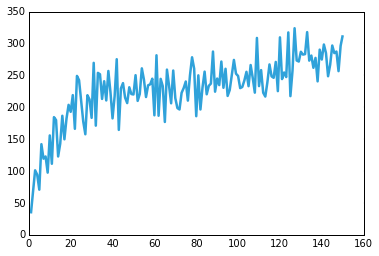

In [66]:
h1_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h1_W_kernel_norm_mean'].val_record])
h1_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h1_kernel_norms_mean'].val_record])
plt.plot(h1_W_norms / h1_W_up_norms)

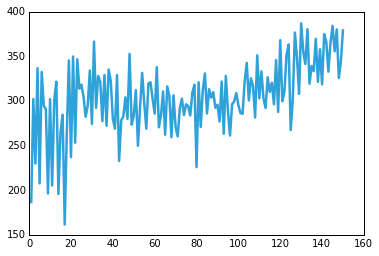

In [67]:
h2_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h2_W_kernel_norm_mean'].val_record])
h2_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h2_kernel_norms_mean'].val_record])
plt.plot(h2_W_norms / h2_W_up_norms)

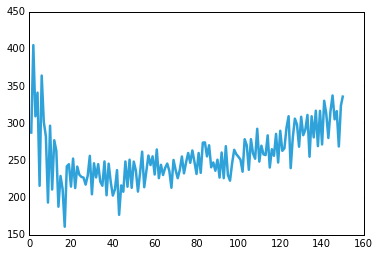

In [68]:
h3_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h3_W_kernel_norm_mean'].val_record])
h3_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h3_kernel_norms_mean'].val_record])
plt.plot(h3_W_norms / h3_W_up_norms)

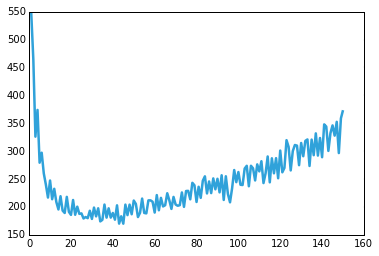

In [69]:
h4_W_up_norms = np.array([float(v) for v in model.monitor.channels['mean_update_h4_W_col_norm_mean'].val_record])
h4_W_norms = np.array([float(v) for v in model.monitor.channels['valid_h4_col_norms_mean'].val_record])
plt.plot(h4_W_norms / h4_W_up_norms)

Annoyingly they also seem to be significantly less than a 1000 already suggesting the LR scale does not need increasingly significantly (on this heuristic at least).